# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv('vehiclesFinal.csv')
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,7119250502,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,7120430837,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


# Basic Information about Dataset

#### Statistics About Numerical Columns

In [3]:
df.describe()

,id,year,odometer,lat,long,price
count,3.742220e+05,374222.000000,374222.000000,374222.000000,374222.000000,374222.000000
mean,7.115975e+09,2011.170933,99082.730455,38.467335,-94.839612,14251.653588
std,4.583794e+06,5.264778,56671.829463,6.089110,17.994045,11137.719627
min,7.104271e+09,1995.000000,0.000000,-83.197100,-177.012000,699.000000
25%,7.112466e+09,2008.000000,53503.250000,34.245500,-110.979000,6000.000000
50%,7.117111e+09,2012.000000,97235.000000,39.049600,-89.438545,11500.000000
75%,7.120107e+09,2015.000000,138134.000000,42.510000,-81.431300,18995.000000
max,7.121608e+09,2021.000000,268564.000000,79.601900,139.388000,126000.000000


#### Overview of Categorical Columns

In [4]:
df.describe(exclude='number')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
count,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222
unique,402,41,27908,6,8,5,6,3,3,4,13,12
top,springfield,ford,f-150,fair,5 cylinders,gas,clean,automatic,4wd,full-size,offroad,grey
freq,3053,66329,7009,158429,141407,325266,354719,338265,226906,318879,96965,138308


#### Datatypes of Columns

In [5]:
df.dtypes

id                int64
region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
price             int64
dtype: object

#### Dimensions of Dataset

In [6]:
df.shape

(374222, 18)

#### All Columns in Dataset

In [7]:
df.columns

Index(['id', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'price'],
      dtype='object')

In [8]:
# df = df.drop(['id', 'manufacturer', 'model', 'region', 'lat', 'long', 'paint_color'], axis=1)

# Data Preprocessing

In [9]:
df.dtypes

id                int64
region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
price             int64
dtype: object

## Handling Missing Values

In [10]:
# Removing 'cylinders' from cylinders column

df['cylinders'] = df['cylinders'].str.extract('(\d+)')

In [11]:
df['cylinders'].fillna(method='bfill', inplace=True)
# df['cylinders'].ffill()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6460\1042531318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna(method='bfill', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6460\1042531318.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cylinders'].fillna(method='bfill', inplace=True)


In [12]:
df.isna().sum()

id              0
region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
price           0
dtype: int64

In [13]:
df['cylinders'].unique()

array(['4', '5', '6', '8', '10', '12', '3'], dtype=object)

In [14]:
df['cylinders'] = df['cylinders'].astype(int)

In [15]:
df['year'] = df['year'].astype(int)

In [16]:
df['year'].nunique()

27

In [17]:
# Converting dtype of 'odometer' to int
df['odometer'] = df['odometer'].astype(int)

In [18]:
df.dtypes

id                int64
region           object
year              int64
manufacturer     object
model            object
condition        object
cylinders         int64
fuel             object
odometer          int64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
price             int64
dtype: object

In [19]:
df.head(3)

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012,jeep,patriot,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014,bmw,328i m-sport,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001,dodge,caravan,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300


In [20]:
df['drive'].unique()

array(['4wd', 'rwd', 'fwd'], dtype=object)

In [21]:
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012,jeep,patriot,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014,bmw,328i m-sport,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001,dodge,caravan,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,7119250502,mohave county,2004,chevrolet,colorado ls,excellent,5,gas,54000,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,7120430837,maine,2005,ford,mustang convertible,excellent,6,gas,62800,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


# Extracting Numerical and Categorical Features

In [22]:
# Extracting Numerical Columns
num_features = df.select_dtypes('number').columns
num_features

Index(['id', 'year', 'cylinders', 'odometer', 'lat', 'long', 'price'], dtype='object')

In [23]:
# Extracting Categorical Columns
cat_features = df.select_dtypes(exclude='number').columns
cat_features

Index(['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')

# Heatmaps

Text(0.5, 1.0, 'Correlation Heatmap')

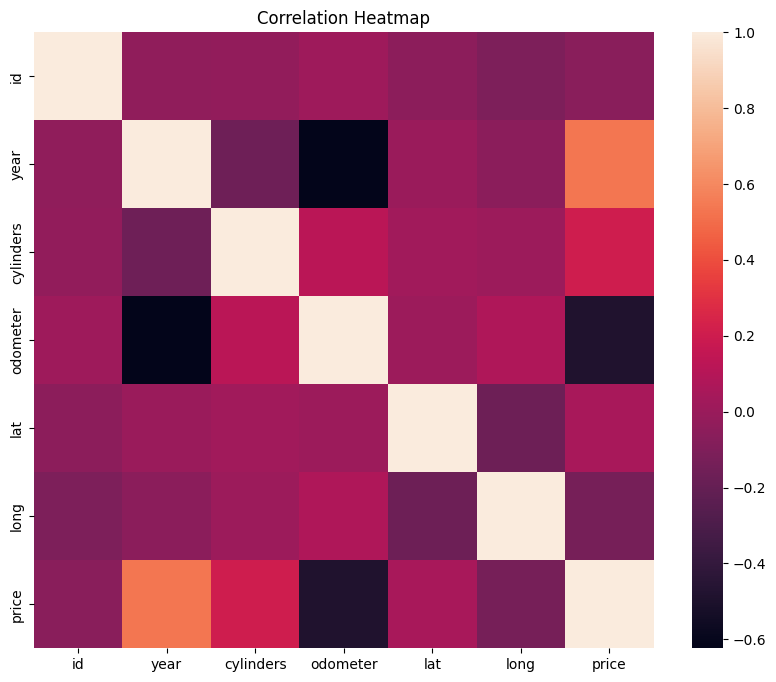

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_features].corr())
plt.title('Correlation Heatmap')

In [25]:
from dython.nominal import associations

assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix)

ModuleNotFoundError: No module named 'dython'

## Handling Duplicates

In [ ]:
# Boolean Duplicates
df_duplicates = df.duplicated()

In [ ]:
# Identifying Duplicates Rows
duplicate_rows = df[df.duplicated()]

In [ ]:
# Controlling Duplicates Detection with 'Keep'

all_duplicates = df[df.duplicated(keep=False)]

In [ ]:
# Removing duplicate rows
df_no_duplicates = df.drop_duplicates()

In [ ]:
df.shape

### Handling Outliers

In [ ]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

In [ ]:
for col in num_features:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    threshold = 3
    df = df[z_scores < threshold]

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

# Data Visualization

#### Year vs Count of Cars

In [ ]:
car_count_by_year = df.groupby('year').size()
print(len(car_count_by_year))

In [ ]:
car_counts = df['year'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(car_counts.index.astype(str), car_counts.values, color='skyblue')
plt.title('Count of Cars by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Condition vs Count of Cars

In [ ]:
condition_counts = df['condition'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(condition_counts.index.astype(str), condition_counts.values, color='red')
plt.title('Count of Cars by Car Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Cylinders vs Count of Cars

In [ ]:
cylinders_counts = df['cylinders'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(cylinders_counts.index.astype(str), cylinders_counts.values, color='green')
plt.title('Count of Cars by Cylinders', fontsize=16)
plt.xlabel('Cylinders', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Fuel vs Count of Cars

In [ ]:
fuel_counts = df['fuel'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(fuel_counts.index.astype(str), fuel_counts.values, color='hotpink')
plt.title('Count of Cars by Fuel Type', fontsize=16)
plt.xlabel('Fuel', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Transmission vs Count of Cars

In [ ]:
transmission_counts = df['transmission'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(transmission_counts.index.astype(str), transmission_counts.values, color='orange')
plt.title('Count of Cars by Transmission Type', fontsize=16)
plt.xlabel('Transmission', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Size Count

In [ ]:
size_counts = df['size'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(size_counts.index.astype(str), size_counts.values, color='lightgreen')
plt.title('Count of Cars by Size', fontsize=16)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Type Counts

In [ ]:
type_counts = df['type'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(type_counts.index.astype(str), type_counts.values, color='violet')
plt.title('Count of Cars by Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Title Status Count

In [ ]:
title_status_counts = df['title_status'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(title_status_counts.index.astype(str), title_status_counts.values, color='purple')
plt.title('Count of Cars by Title Status', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Drive Count

In [ ]:
drive_counts = df['drive'].value_counts().sort_index()
plt.figure(figsize=(10, 6))

bars = plt.bar(drive_counts.index.astype(str), drive_counts.values, color='aqua')

plt.bar(drive_counts.index.astype(str), drive_counts.values, color='aqua')
plt.title('Count of Cars by Drive', fontsize=16)
plt.xlabel('Drive', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Year vs Average Price

In [ ]:
average_price_per_year = df.groupby('year')['price'].mean().reset_index().astype(int)
average_price_per_year.columns = ['Year', 'Average Price']  # Rename columns for clarity

plt.figure(figsize=(15, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Average Price'], marker='o', color='skyblue', linestyle='-')
plt.title('Average Price Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price in $', fontsize=14)
plt.xticks(average_price_per_year['Year'])
plt.show()